# LDA-Based Topic Modeling for Analyzing Software Engineering Skills and Competencies for the digital payment industry in Hong Kong

## Load data set

In [79]:
import pandas as pd

csv_filename = "20230508_020939+0000"

# Read the CSV file into a pandas DataFrame
job_advertisements = pd.read_csv(f'./data/{csv_filename}.csv')

# Remove non-essential columns
job_advertisements = job_advertisements.loc[:, ~job_advertisements.columns.str.contains('^Unnamed')]
job_advertisements = job_advertisements.drop(columns=['id', 'source', 'job_title', 'created_at'], axis=1)

# Print head
job_advertisements.head()


,job_description
0,"【Job Requirement】</p><ul><li><span>Have Bachelor's Degree in IT-related disciplines or equivalent: </span><span>Computer Science or Computer Engineering is highly preferrable.</span></li><li><span>Accept fresh graduate</span><span>(Bachelor’s degree) with Java skills.</span></li><li><span>Have combination of experience including but not limited to the following items:</span><ul><li><span>Web-based and database application development</span></li><li><span>Solid skill in </span><span>Java</span><span>,</span><span> web server programming, XML, HTML5, Javascript/Javascript framework</span></li></ul></li><li><span>Have IT experience in the following items</span><span> is preferrable</span><span>:</span><ul><li><span style=""font-family:inherit;font-size:12pt"">Implementation of web-based and database application;</span></li><li><span style=""font-family:inherit;font-size:12pt"">Using the Rapid Application Development/Agile Software Development methodology;</span></li><li><span style=""font-..."
1,"<strong>Job Requirements:</strong><br><br>• Bachelor’s degree in Computer Science, Telecommunications, Engineering or equivalent.<br>• Minimum of 7 years professional experience in design, development and implementation of Java application with proven practical experience.<br>• 5+ years relevant experience building large-scale infrastructure applications or similar experience.<br>• Expertise experience in the Card Payment/Digital Payment/Banking industry.<br>• Expert in object-oriented design, data structures and algorithms.<br>• Expertise experience in Java technologies, frameworks, API, SOAP/RESTful web services, Junit.<br>• Expertise experience with front-end development (Angular, React, TypeScript, HTML5, CSS3 or similar JavaScript framework).<br>• Database experience with SQL, PostgreSQL, Oracle, or similar database technologies.<br>• Experience designing, analyzing and improving efficiency, scalability, and stability of various system resources.<br>• Experience owning a parti..."
2,"<strong>Job Requirements:</strong></span></span></p><ul><li><span style=""font-size:10pt"">Degree or above in IT or any relevant disciplines</span></li><li><span style=""font-size:10pt"">At least 5 years’ solid experience in operating IBM i (previously known as IBM AS/400)</span></li><li><span style=""font-size:10pt"">Experience in COBOL and CL programming language</span></li><li><span style=""font-size:10pt"">Proficient in system analysis, design and coding for Finance payment system</span></li><li><span style=""font-size:10pt"">Solid application knowledge in Credit Card Business is an advantage</span></li><li><span style=""font-size:10pt"">Strong analytical skills, self-motivated and able to work under pressure</span></li><li><span style=""font-size:10pt"">Good communication and interpersonal skills</span></li><li><span style=""font-size:10pt"">Good command in both spoken and written English and Chinese</span></li><li><span style=""font-size:10pt"">Less experience will be considered as Support Ana..."
3,"<br> Min. 5 years relevant development experience preferable at international agencies in digital production <br><br> Bachelor’s degree in computer science and related disciplines <br><br> Thorough knowledge in AWS, PHP, MySQL, JavaScript, and Bootstrap <br><br> Strong knowledge of relational database design, object oriented programming, data structures, algorithms and design patterns <br><br> Experience with LAMP, Azure, messaging platforms, natural language processing, chatbot, CRM, payment gateways, Spark AR, and photo editing software is a plus <br><br> Experience in product management is an advantage <br><br> Experience working with end users, project managers and designers <br><br> Strong communication skills and the ability to lead a development team <br><br> Detail-minded, proactive, self-motivated, and willing to take responsibility <br><br> Fluent in English and Cantonese <br><br>"
4,"</h4> <ul> <li>Excellent at analytica

## Data Preprocessing



### Remove all HTML tags

In [80]:
import re

HTML_TAG_REGEX = re.compile('<.*?>')

def remove_html_tags(html: str) -> str:
    if html is None or len(html) == 0:
        return html
        
    return re.sub(HTML_TAG_REGEX, ' ', html).strip()    

# Remove all HTML tags
job_advertisements['job_description'] = job_advertisements['job_description'].map(lambda html: remove_html_tags(html))

# Print head
job_advertisements['job_description'].head()


0    【Job Requirement】    Have Bachelor's Degree in IT-related disciplines or equivalent:   Computer Science or Computer Engineering is highly preferrable.    Accept fresh graduate  (Bachelor’s degree) with Java skills.    Have combination of experience including but not limited to the following items:    Web-based and database application development    Solid skill in   Java  ,   web server programming, XML, HTML5, Javascript/Javascript framework      Have IT experience in the following items   is preferrable  :    Implementation of web-based and database application;    Using the Rapid Application Development/Agile Software Development methodology;    Implementation or maintenance of common services such as messaging notification online payment. client authentication using digital certificates etc provided by EGIS:    Implementation or maintenance of System that support payment using digital wallet    Implementation or maintenance of System adopted virtualization technologies and hos

### Remove all stop words, punctuation and symbols

In [86]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

CHARACTER_AND_EMPTY_SPACE_REGEX = re.compile('[^\w\s]')
STOP_WORDS_SET = set(stopwords.words('english'))

def remove_stop_words(text: str) -> str:
    if text is None or len(text) == 0:
        return text
        
    word_tokens = word_tokenize(text)
    filtered_sentence_word_list = [w for w in word_tokens if not w.lower() in STOP_WORDS_SET]
    return ' '.join(filtered_sentence_word_list)


def remove_punctuation_and_symbols(text:str) -> str:
    if text is None or len(text) == 0:
        return text
    
    return re.sub(CHARACTER_AND_EMPTY_SPACE_REGEX, ' ', text)

# Remove all stop words
job_advertisements['job_description'] = job_advertisements['job_description'].map(lambda description: remove_stop_words(description))

# Remove all punctuation and symbols
job_advertisements['job_description'] = job_advertisements['job_description'].map(lambda description: remove_punctuation_and_symbols(description))

# Print head
job_advertisements['job_description'].head()

<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
/var/folders/46/c6893zp150vbs3w6n0z3m7300000gn/T/ipykernel_82206/3561012207.py:4: DeprecationWarning: invalid escape sequence \w
  CHARACTER_AND_EMPTY_SPACE_REGEX = re.compile('[^\w\s]')


0                                                                                                        Job Requirement Bachelor Degree related disciplines equivalent Computer Science Computer Engineering highly preferrable Accept fresh graduate Bachelor degree Java skills combination experience including limited following items Web based database application development Solid skill Java web server programming XML HTML5 Javascript Javascript framework experience following items preferrable Implementation web based database application Using Rapid Application Development Agile Software Development methodology Implementation maintenance common services messaging notification online payment client authentication using digital certificates etc provided EGIS Implementation maintenance System support payment using digital wallet Implementation maintenance System adopted virtualization technologies host GovCloud EGIS Shall communicate levels English Cantonese proficient English technical wri

### Convert to lowercase

In [87]:
# Convert all descriptions to lowercase
job_advertisements['job_description'] = job_advertisements['job_description'].map(lambda description: description.lower())

# Print head
job_advertisements['job_description'].head()

0                                                                                                        job requirement bachelor degree related disciplines equivalent computer science computer engineering highly preferrable accept fresh graduate bachelor degree java skills combination experience including limited following items web based database application development solid skill java web server programming xml html5 javascript javascript framework experience following items preferrable implementation web based database application using rapid application development agile software development methodology implementation maintenance common services messaging notification online payment client authentication using digital certificates etc provided egis implementation maintenance system support payment using digital wallet implementation maintenance system adopted virtualization technologies host govcloud egis shall communicate levels english cantonese proficient english technical wri


### Tokenization

In [88]:
from gensim.utils import simple_preprocess

def sent_to_words(sentences: str):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))

# Tokenize
job_advertisements_data = job_advertisements['job_description'].values.tolist()
job_advertisements_data_words = list(sent_to_words(job_advertisements_data))

# Print head
print(job_advertisements_data_words[:1][0][:30])

['job', 'requirement', 'bachelor', 'degree', 'related', 'disciplines', 'equivalent', 'computer', 'science', 'computer', 'engineering', 'highly', 'preferrable', 'accept', 'fresh', 'graduate', 'bachelor', 'degree', 'java', 'skills', 'combination', 'experience', 'including', 'limited', 'following', 'items', 'web', 'based', 'database', 'application']


### Prepare trigram models 

In [89]:
import gensim

# Build the bigram and trigram models
bigram = gensim.models.Phrases(job_advertisements_data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[job_advertisements_data_words], threshold=100)

bigram_models = gensim.models.phrases.Phraser(bigram)
trigram_models = gensim.models.phrases.Phraser(trigram)

### Perform Lemmatization

In [90]:
# !python -m spacy download en_core_web_sm
import spacy

def make_bigrams(texts: str) -> list:
    return [bigram_models[doc] for doc in texts]

def make_trigrams(texts: str) -> list:
    return [trigram_models[bigram_models[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# From Bigrams
job_advertisements_trigrams = make_trigrams(job_advertisements_data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Perform Lemmatization
preprocessed_job_advertisements = lemmatization(job_advertisements_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Print head
print(preprocessed_job_advertisements[:1][0])
print(preprocessed_job_advertisements[:2][1])
print(preprocessed_job_advertisements[:3][2])
print(preprocessed_job_advertisements[:4][3])
print(preprocessed_job_advertisements[:5][4])

['job', 'requirement', 'bachelor', 'degree', 'relate', 'discipline', 'equivalent', 'computer', 'science', 'computer', 'engineering', 'highly', 'preferrable', 'accept', 'fresh', 'graduate', 'bachelor', 'degree', 'skill', 'combination', 'experience', 'include', 'limited', 'following_item', 'web', 'base', 'database', 'application', 'development', 'solid', 'skill', 'web', 'server', 'programming', 'xml', 'experience', 'following_item', 'preferrable', 'implementation', 'web', 'base', 'database', 'application', 'use', 'rapid', 'application', 'development', 'agile', 'software', 'development', 'methodology', 'implementation', 'maintenance', 'common', 'service', 'message', 'notification', 'online', 'payment', 'client_authentication', 'use', 'digital', 'certificate', 'provide', 'egis', 'implementation', 'maintenance', 'system', 'support', 'payment', 'use', 'digital', 'wallet', 'implementation', 'maintenance', 'system', 'adopt', 'virtualization', 'technology', 'host', 'govcloud', 'egi', 'communica

### Convert to document term matrix (DTM)

In [91]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(preprocessed_job_advertisements)

# Create Corpus
texts = preprocessed_job_advertisements

# Convert to document term matrix (DTM)
corpus = [id2word.doc2bow(text) for text in texts]

# Print head
print(corpus[:1][0][30])

(30, 1)


## Data Interpretation

### Calculate the optimal number of topics

In [47]:
import tqdm
import numpy as np
from gensim.models import CoherenceModel

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {
    'Validation_Set': [],
    'Topics': [],
    'Alpha': [],
    'Beta': [],
    'Coherence': []
}

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./lda_tuning_results.csv', index=False)
    pbar.close()


100%|██████████| 540/540 [29:03<00:00,  3.23s/it]


### LDA-based Topic Modeling


In [92]:
from pprint import pprint

num_topics = 15

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       iterations=1500,
                                       per_word_topics=True)

doc_lda = lda_model[corpus]

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.059*"development" + 0.039*"familiar" + 0.027*"perform" + 0.020*"computer" '
  '+ 0.020*"compute" + 0.020*"information" + 0.020*"capable" + 0.020*"high" + '
  '0.020*"science" + 0.018*"analytical"'),
 (1,
  '0.034*"implementation" + 0.034*"application" + 0.030*"development" + '
  '0.028*"web" + 0.027*"maintenance" + 0.026*"use" + 0.026*"experience" + '
  '0.021*"english" + 0.020*"database" + 0.020*"base"'),
 (2,
  '0.002*"experience" + 0.002*"application" + 0.002*"requirement" + '
  '0.002*"development" + 0.002*"implementation" + 0.002*"year" + 0.002*"use" + '
  '0.002*"least" + 0.002*"service" + 0.002*"datum"'),
 (3,
  '0.047*"experience" + 0.032*"design" + 0.029*"good" + 0.028*"software" + '
  '0.024*"development" + 0.022*"knowledge" + 0.020*"programming" + '
  '0.017*"rest" + 0.016*"qualification" + 0.016*"system"'),
 (4,
  '0.036*"experience" + 0.024*"development" + 0.024*"banking" + '
  '0.024*"project" + 0.024*"java" + 0.013*"strong" + 0.013*"year" + '
  '0.013*"system" 

### Topic Extraction

In [93]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('expand_frame_repr', True)

num_terms = 10

topics = [ [(id2word[wid], s) for (wid, s) in lda_model.get_topic_terms(tid, topn=num_terms)] for tid in range(15)]
# pprint(topics)

topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, num_terms+1)], index=['Topic '+str(t) for t in range(1, num_topics+1)]).T
topics_df.head()

# Set column width
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, num_topics+1)])
topics_df

,Terms per Topic
Topic1,"development, familiar, perform, computer, compute, information, capable, high, science, analytical"
Topic2,"implementation, application, development, web, maintenance, use, experience, english, database, base"
Topic3,"experience, application, requirement, development, implementation, year, use, least, service, datum"
Topic4,"experience, design, good, software, development, knowledge, programming, rest, qualification, system"
Topic5,"experience, development, banking, project, java, strong, year, system, technology, requirement"
Topic6,"experience, work, good, skill, knowledge, development, software, ability, design, service"
Topic7,"advantage, engineering, electronic, detail, fluency, attention, hardware, learner, reliable, fast"
Topic8,"strong, experience, knowledge, good, skill, development, server, lean, basic, aliyun"
Topic9,"experience, knowledge, development, relate, work, payment, good, application, write, design"
Topic10,"design, experience, engineering, development, application, good, system, solution, engineer, api"


## Data Evaluation

### Calculate coherence measurement score

In [94]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                    texts=texts, 
                                    dictionary=id2word,
                                    coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score (mean): {coherence_lda}')

coherence_per_topics = coherence_model_lda.get_coherence_per_topic()
print('Coherence score per topic:')
pprint(coherence_per_topics)


Coherence Score (mean): 0.5000833241806458
Coherence score per topic:
[0.6338637712048256,
 0.759132278417691,
 0.46584347550986227,
 0.4783705094977478,
 0.4905790871747868,
 0.2595395186082302,
 0.7790682781344264,
 0.7996057753217368,
 0.5269841154145741,
 0.16443341527663383,
 0.2805801999096346,
 0.3988238147083399,
 0.29688114999559057,
 0.47935961454997206,
 0.6881848589856345]


### Visualize coherence score per topic

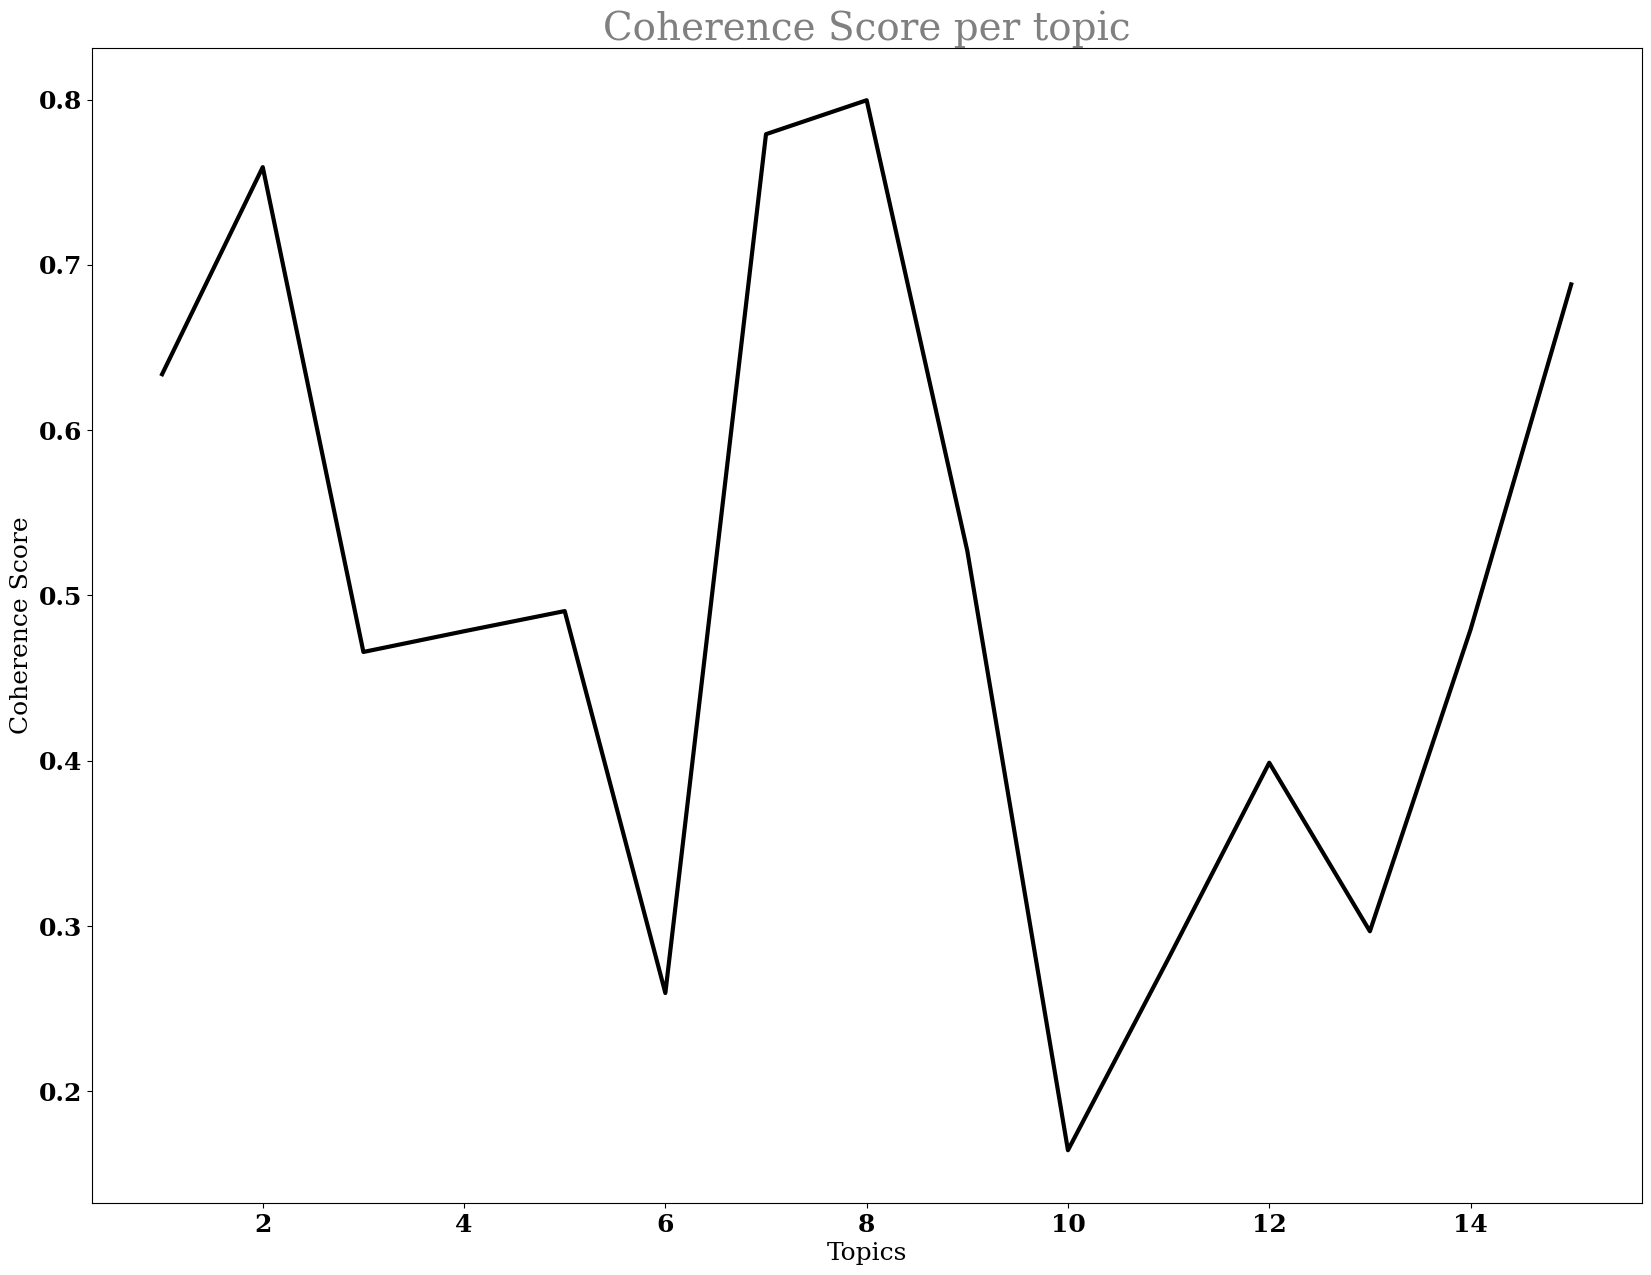

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# lda_tuning_results = pd.read_csv('./lda_tuning_results.csv')
# lda_tuning_results = lda_tuning_results.drop(columns=['Validation_Set', 'Alpha', 'Beta'])
# lda_tuning_results.head()

# xpoints = np.array(lda_tuning_results['Topics'])
# ypoints = np.array(lda_tuning_results['Coherence'])

x_points = np.array([index + 1 for index in range(len(coherence_per_topics))])
y_points = np.array(coherence_per_topics)

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 18
})
plt.title('Coherence Score per topic', color='grey', fontsize=28)
plt.xlabel('Topics', fontsize=18)
plt.ylabel('Coherence Score', fontsize=18)
plt.plot(x_points, y_points, color='black', linewidth=3)
plt.show()

In [96]:
for idx, topic_coherence_val in enumerate(coherence_per_topics):
    print(f'Topic: {idx + 1} has Coherence Value of {topic_coherence_val}')

Topic: 1 has Coherence Value of 0.6338637712048256
Topic: 2 has Coherence Value of 0.759132278417691
Topic: 3 has Coherence Value of 0.46584347550986227
Topic: 4 has Coherence Value of 0.4783705094977478
Topic: 5 has Coherence Value of 0.4905790871747868
Topic: 6 has Coherence Value of 0.2595395186082302
Topic: 7 has Coherence Value of 0.7790682781344264
Topic: 8 has Coherence Value of 0.7996057753217368
Topic: 9 has Coherence Value of 0.5269841154145741
Topic: 10 has Coherence Value of 0.16443341527663383
Topic: 11 has Coherence Value of 0.2805801999096346
Topic: 12 has Coherence Value of 0.3988238147083399
Topic: 13 has Coherence Value of 0.29688114999559057
Topic: 14 has Coherence Value of 0.47935961454997206
Topic: 15 has Coherence Value of 0.6881848589856345


## Data Visualization

### PyLDAvis

In [97]:
import os
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(f'./ldavis_tuned_{str(num_topics)}')

if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, f'./ldavis_tuned_{str(num_topics)}.html')

LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.209121  0.193645       1        1  21.299339
10     0.062247  0.006612       2        1  19.397344
12     0.059017 -0.068519       3        1  11.467492
8      0.150595 -0.118065       4        1  10.968739
3     -0.034860 -0.105931       5        1  10.302829
11    -0.031387 -0.073681       6        1   9.686242
14    -0.000677  0.064492       7        1   4.497245
7      0.070366 -0.054584       8        1   4.207677
9      0.028618 -0.032932       9        1   3.644449
0     -0.005636  0.021075      10        1   2.033516
4     -0.023508  0.023114      11        1   1.390643
6     -0.160815  0.075416      12        1   0.853897
2     -0.108132  0.023896      13        1   0.083530
5     -0.106587  0.021942      14        1   0.083530
13    -0.108364  0.023519      15        1   0.083530, topic_info=                      Term        Freq       Total Category  logprob  loglift
22              experience  122.000000  122.000000  Default  30.0000  30.0000
14             development   64.000000   64.000000  Default  29.0000  29.0000
206              advantage   14.000000   14.000000  Default  28.0000  28.0000
95                  design   31.000000   31.000000  Default  27.0000  27.0000
19             engineering   13.000000   13.000000  Default  26.0000  26.0000
127              knowledge   40.000000   40.000000  Default  25.0000  25.0000
205                   year   30.000000   30.000000  Default  24.0000  24.0000
217                  least   17.000000   17.000000  Default  23.0000  23.0000
186                 strong   24.000000   24.000000  Default  22.0000  22.0000
29          implementation   25.000000   25.000000  Default  21.0000  21.0000
34             maintenance   18.000000   18.000000  Default  20.0000  20.0000
57                     use   23.000000   23.000000  Default  19.0000  19.0000
11                computer   24.000000   24.000000  Default  18.0000  18.0000
3              application   46.000000   46.000000  Default  17.0000  17.0000
114                   good   39.000000   39.000000  Default  16.0000  16.0000
45                  relate   20.000000   20.000000  Default  15.0000  15.0000
47                 science   20.000000   20.000000  Default  14.0000  14.0000
115                   high   10.000000   10.000000  Default  13.0000  13.0000
56              technology   26.000000   26.000000  Default  12.0000  12.0000
50                   skill   50.000000   50.000000  Default  11.0000  11.0000
51                software   25.000000   25.000000  Default  10.0000  10.0000
280               familiar    8.000000    8.000000  Default   9.0000   9.0000
12                database   28.000000   28.000000  Default   8.0000   8.0000
16              discipline   19.000000   19.000000  Default   7.0000   7.0000
30                 include   18.000000   18.000000  Default   6.0000   6.0000
55               technical   18.000000   18.000000  Default   5.0000   5.0000
42             programming   20.000000   20.000000  Default   4.0000   4.0000
5                     base   15.000000   15.000000  Default   3.0000   3.0000
60                     web   32.000000   32.000000  Default   2.0000   2.0000
54                  system   39.000000   39.000000  Default   1.0000   1.0000
34             maintenance   17.606705   18.222828   Topic1  -3.6120   1.5121
40             preferrable   11.154099   11.738185   Topic1  -4.0685   1.4955
23          following_item   10.230794   10.812013   Topic1  -4.1549   1.4912
542                  month    8.404982    8.962544   Topic1  -4.3515   1.4823
10             communicate    7.436614    8.029715   Topic1  -4.4739   1.4698
44                   rapid    6.521860    7.104634   Topic1  -4.6052   1.4609
61                 writing    6.520877    7.104082   Topic1  -4.6053   1.4608
7    client_authentication    6.519960    7.104156   Topic1  -4.6055   1.46

### Words Cloud

/Users/ypinglai/Workspaces/UOEO/dissertation/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


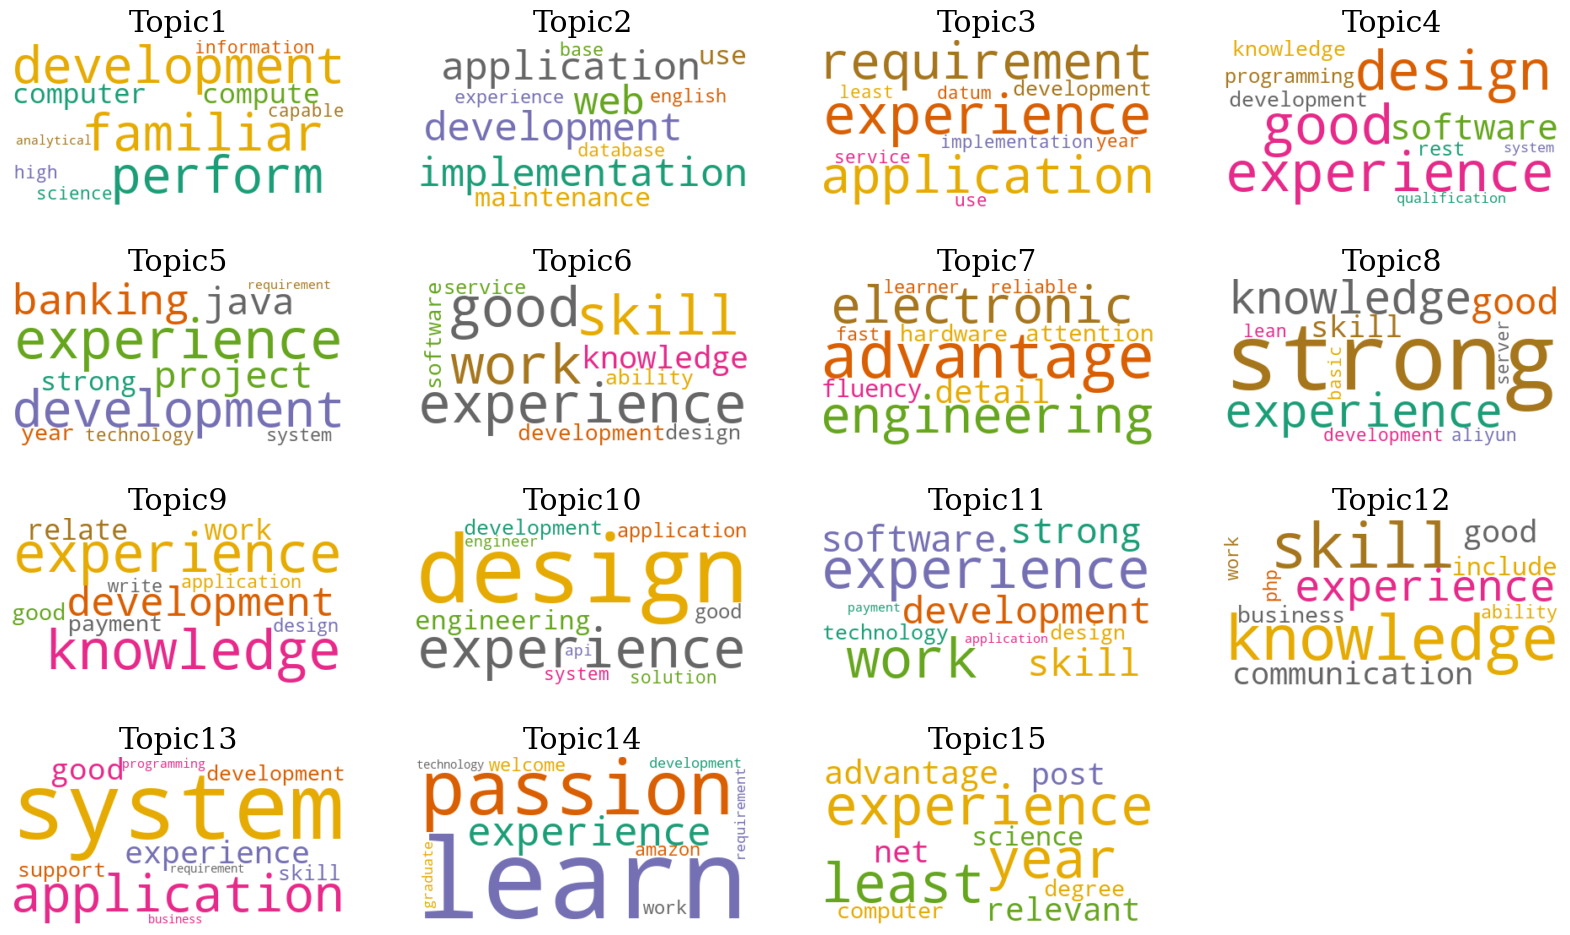

In [98]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(15):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()